Parametric regression models
----------------------------

Typically when learning a regression model, one wishes to obtain a
estimate of the relationship between the two variables, in addition to a
measure of uncertainty in this relationship. Typically this is achieved
by specifying a function relating the two variables, and then using
Machine Learning techniques to calibrate parameters of that function
based on sampled data. The function can be specified based on expert
knowledge, or alternatively a very general function is chosen.

The most simple regression models usually consist of the inner product
of a parameter vector and a vector of 'features', such that the model
output's dependency on the parameters to be calibrated is linear. The
features, usually known as the basis, are a function of the input
variables, which may be non-linear. Models of this form are amenable to
computation, and in general a wide variety of functions can be expressed
in this way. In this formulation the output of the model is given by
$f(x, \boldsymbol{p}) = \sum_i p_i \phi_i(x),$ where $x$ and
$f(x,\boldsymbol{p})$ represent the input and output to the regression
model, respectively, $p_i$ are the parameters of the model to be
calibrated which are components of the vector $\boldsymbol{p}$, and
$\phi_i(x)$ is the basis {cite}`friedman2001elements`. Let $x$ be a vector in
$\mathbb{R}^N$, with components $x_i$.

The basis should be chosen based on prior knowledge and engineering
judgement. Basis functions are either global or local. A local basis
consists of radial functions, which only depend upon the distance from a
certain point, i.e. $\phi(x) = \phi(|x|)$. The Gaussian basis is a
common radial basis function, where
$\phi_i(x) = \exp{(-\epsilon_i (x-c_i)^2)}$. $\epsilon_i$ and $c_i$ are
parameters which can be set based on knowledge of the physical process
being modelled or learnt from data at the same time as $p_i$, though
this is more difficult because $f(x)$ has non-linear dependency on these
parameters. The Gaussian basis function tends to zero far away from
$c_i$. On the other hand, a global basis consists of functions which in
general are non-zero at all points in the input space. For example, the
global polynomial basis of the form $\phi_i(x) = \prod_i x_i^{l_i}$,
with indices $l_i$ chosen based on engineering judgement, is nonzero
everywhere except for $x=0$.

Polynomial Chaos Expansions offer a principled way to choose basis
functions. Polynomial Chaos Expansions are a class of regression model
with a basis consisting of polynomials which are orthogonal to each
other, i.e. their inner product is zero with respect to a probability
distribution over their inputs
($\int_{\mathbb{R}^N} \phi_i(x) \phi_j(x) p(x) dx = 0 \forall i\neq j$)
{cite}`schobi2017surrogate`.

In order to learn more complex functions, a more complex function
representation is needed, with the ability to model arbitrary
non-linearities in the model parameters to be learned. Neural networks
are a widely used regression model which fulfil this purpose
{cite}`friedman2001elements`. Neural networks consist of neurons which apply
an inner product between the input and a parameter vector, and then
apply an arbitrary non-linearity, before feeding into other neurons,
until finally the result is outputted. These computational neurons are
organised into layers, which is equivalent to multiplying the input by a
parameter matrix (known as a weight matrix), rather than a vector. The
way in which layers are connected can lead to desirable properties, for
example spatial invariance of particular layers over the input when the
input is an image, i.e. a matrix. This is equivalent to repeating
parameters in the weight matrix. The most simple way to connect the
layers is to allow each layer to be completely connected to the
subsequent layer, which is known as the feedforward architecture. Layer
$i$ of a feed-forward neural network is given by
```{math}
:label: eq:net
f_{i}(x, W)=\operatorname{act}{(W_{i} f_{i-1}(x))},
```
where $f_{i}(x, W)$ is a vector (which is the input vector $x$ when
$i=0$, i.e. $f_0(x) = 0$), $\operatorname{act}$ is a non-linear
activation function, and $W_{i}$ is the $i$th weight matrix. The
activation function is typically the hyperbolic tangent function, the
soft-max function or the rectified linear function. A diagram of a
feed-forward neural network is shown in
{ref}`fig:net_diagram`. {cite}`sundararajan2012probabilistic`
demonstrates how neural networks can be trained to replicate the
opinions of expert engineers on the probability of failure of particular
pipe welds in a power plant.

```{figure} figures/neural_network_diagram.png
---
height: 150px
name: fig:net_diagram
---
A diagram of a feed-forward neural network with three hidden layers,
each with a width of three neurons. The activation function, which is
applied to the weighted sum of the inputs to each neuron, is not
shown.
```

### Bayesian parameter learning

#### Defining a data likelihood

It is common to define a probability distribution based on the output of
a regression model, and then use the probability calculus introduced in
Chapter {ref}`ch:uncertainty_models` to learn distributions over the
parameters of the regression model. For simple models it is usually
assumed that the output $f(x)$ of the model is some meaningful parameter
of the distribution, e.g. the mean of a normal distribution:
$p(y|x, \boldsymbol{p}) =  \mathcal{N}(f(x, \boldsymbol{p}),\,\sigma^{2}),$
where $\sigma$ is the scale parameter of the normal distribution, which
should be learned form data. This results in a model where the level of
uncertainty in $p(y|x)$ does not depend on the input to the model. This
is known as a homoscedastic model of uncertainty.

Sometimes it is desirable to explicitly allow the uncertainty in the
predictions to depend on $x$. This is known as heteroscedastic
uncertainty {cite}`gal2016uncertainty`. In this case it can be useful to
define a model where other parameters of the distribution depend on $x$,
i.e. we define
$p(y|x, \boldsymbol{p}) =  \mathcal{N}(f_1(x, \boldsymbol{p}_1),\, f_2(x, \boldsymbol{p}_2)^{2}),$
where $f_1(x, \boldsymbol{p}_1)$ and $f_2(x, \boldsymbol{p}_2)$ are
different functions with different parameter sets, $\boldsymbol{p}_1$
and $\boldsymbol{p}_2$.

Any valid probability distribution can be used in a similar way, for
example the Dirac delta function can be used to define
$p(y|x, W, u) =  \delta(y - f_{i}(x, u, W)),$ where $f_{i}(x)$ is the
output of a neural network, where in this case the input layer is a
function of the true input and a random vector of noise, i.e.
$f_0(x, u, W) = \operatorname{concatenate}(x, u)$ where
$u \sim \mathcal{U}(0,1)$. This is a very popular formulation in Machine
Learning for Computer Vision {cite}`goodfellow2014generative`
{cite}`doersch2016tutorial`, because $p(y|x, W, u)$ can now be used to learn
a very general probability density in a computationally tractable way,
since
$p(y|x, W) = \int{\delta(y - f_{i}(x, u, W)) \mathcal{U}(0,1) d u}$ can
be evaluated easily using a Monte Carlo estimator during inference of
the posterior distribution.

#### Performing the Bayesian computation

Using a set of $n$ training samples,
$\mathcal{X}_\text{train} = \{ \{x^{(1)}, y^{(1)}\}, ..., \{x^{(n)}, y^{(n)}\} \}$,
one can learn a distribution over $\boldsymbol{p}$ in the same way as in
Chapter {ref}`ch:uncertainty_models` by using
```{math}
:label: eqn:bayes_law_ML
P(\boldsymbol{p} | \mathcal{X}_\text{train}) =
    \frac{P(\mathcal{X}_\text{train} | \boldsymbol{p}) p(\boldsymbol{p})}{P(\mathcal{X}_\text{train})} =
    \frac{ \prod_i P(x^{(i)}, y^{(i)}| \boldsymbol{p}) p(\boldsymbol{p})}{P(\mathcal{X}_\text{train})} =
    \frac{ \prod_i p(y^{(i)}| x^{(i)}, \boldsymbol{p}) p(x^{(i)}) p( \boldsymbol{p})}{P(\mathcal{X}_\text{train})}
    ,
```
where the data likelihood can be written as
$P(\mathcal{X}_\text{train} | \boldsymbol{p}) = \prod_i p(y^{(i)}, x^{(i)}| \boldsymbol{p})$
by assuming independence of training samples, $p(\boldsymbol{p})$
represents a prior distribution on $\boldsymbol{p}$,
$p(x^{(i)}, \boldsymbol{p})=p(x^{(i)}) p(\boldsymbol{p})$ by assuming
independence of $\boldsymbol{p}$ and the sampled inputs, and
$P(\mathcal{X}_\text{train}) =  \int{ \prod_i p(y^{(i)}| x^{(i)}, \boldsymbol{p}) p(x^{(i)}, \boldsymbol{p}) d\boldsymbol{p}}$
acts as a normalising constant. As in
Chapter {ref}`ch:uncertainty_models`, the posterior distribution on
$\boldsymbol{p}$ will tend to concentrate around one point as more data
is received.

The maximum likelihood and maximum a posteriori estimators described in
Chapter {ref}`ch:uncertainty_models` are equally applicable here. These
estimators are evaluated by minimising so-called loss functions
(objective functions). The maximum a posteriori estimator for
$\boldsymbol{p}$ is obtained by evaluating
$\boldsymbol{p}_{\text{MAP}} = \max_{\boldsymbol{p}} P(\boldsymbol{p} | \mathcal{X}_\text{train})$,
where
$P(\boldsymbol{p} | \mathcal{X}_\text{train}) \propto P(\mathcal{X}_\text{train} | \boldsymbol{p}) P(\boldsymbol{p}) = \mathcal{L}_\text{MAP} (\boldsymbol{p})$.
The maximum likelihood estimator for $\boldsymbol{p}$ is obtained by
evaluating
$\boldsymbol{p}_\text{ML} = \max_{\boldsymbol{p}} \mathcal{L}_\text{ML} (\boldsymbol{p}) = \max_{\boldsymbol{p}} P(\mathcal{X}_\text{train} | \boldsymbol{p})$.
The maximum likelihood estimator is equivalent to the maximum
a posteriori estimator when a uniform prior distribution is used. Using
a normal distribution for the data likelihood leads to the well known
mean squared error or $\ell_2$ norm loss function when the maximum
likelihood estimator is used. Using a polynomial basis with the mean
squared error loss function leads to ordinary least squares regression.
If a normal distribution prior is used then this leads to an $\ell_2$
weight regularisation (squared penalty) in the maximum a posteriori loss
function. In a similar way, most sensible loss functions which aim to
estimate point values for parameters have a Bayesian interpretation.

#### Computational methods

In practice, the most common way to create regression models is to
evaluate the estimators $\boldsymbol{p}_\text{ML}$ or
$\boldsymbol{p}_\text{MAP}$ with Stochastic Gradient Ascent, which
maximises the logarithm of the relevant probability distribution (or
equivalently by using Stochastic Gradient Descent to minimise the
negative of the log posterior). This is computationally tractable even
for high dimensional $\boldsymbol{p}$, since usually the gradient of
$\log{P(\boldsymbol{p} | \mathcal{X}_\text{train})}$ is known
analytically. Gradient Descent methods are a class of optimisation
methods which adjust the value for a parameter at each step of the
algorithm by subtracting a small learning rate constant, $\eta$,
multiplied by the gradient of the loss, $\mathcal{L}$, with respect to
the trainable parameter, i.e.
$p_i \gets p_i + \eta \frac{\partial \mathcal{L}}{\partial p_i}.$ This
is repeated for a set number of iterations until the algorithm has
converged. Stochastic Gradient Descent approximates the product of
likelihoods in the loss function by evaluating the likelihood for one
different sampled data point at each iteration. This is effective since
the expectation of the loss used in Stochastic Gradient Descent will
still be equal to the true value of the loss function. In this case, the
learning rate constant must be reduced to ensure convergence, which
means many iterations of the algorithm are required to ensure a good
estimate for the parameters is obtained. Mini-batches, where the
likelihood is evaluated for a small set of data points at each
iteration, can be used to achieve good convergence at higher learning
rates, whilst decreasing the required computational time, since a GPU
can be used {cite}`ruder2016overview`. Various improvements to Stochastic
Gradient Descent aim to ensure that the optimiser reaches a true minimum
of the loss function, a particularly common improvement being the ADAM
optimiser {cite}`kingma2014adam`.

Using the maximum likelihood and maximum a posteriori estimators can
allow some estimate of the uncertainty in the model to be made, but this
uncertainty is an underestimate of the true model uncertainty. For very
simple regression models, MCMC can be used to obtain the full posterior
distribution on $\boldsymbol{p}$, however this is usually intractable
for models with large parameter sets. As an alternative, variational
inference can be used to minimise the difference between the
$P(\boldsymbol{p} | \mathcal{X}_\text{train})$ and an approximating
posterior distribution, as described in
Chapter {ref}`ch:uncertainty_models`. Note that
$P(\boldsymbol{p} | \mathcal{X}_\text{train})$ must be differentiable in
$\boldsymbol{p}$ for this to be possible. Using Bayes' law to infer
posterior distributions over the weights of a neural network is referred
to as training a Bayesian neural network, and this is almost always
achieved by using variational inference {cite}`blundell2015weight`.

The technique of dropout sampling has been shown to improve the
performance of Stochastic Gradient Descent solvers, by improving the
performance on validation tests {cite}`srivastava2014dropout`. Dropout
sampling involves randomly setting a fraction, $p_\text{dropout}$ of the
weights to zero during each training iteration. For particular choices
of activation function, when an $l_2$ penalty on the weights is used in
the loss function, it can be shown that dropout sampling is equivalent
to variational inference on a Bayesian neural network, where a Bernoulli
distribution is used as the approximating posterior distribution
{cite}`gal2016dropout`. In order for the approximating posterior distribution
to be an accurate representation of the true posterior distribution, it
is necessary to adjust the dropout probability, $p_\text{dropout}$.
Rather than repeatedly performing training with different dropout
probabilities, it is more efficient to make the dropout probability a
parameter which can be optimised during training, by making the loss
differentiable in terms of the dropout probability. This can be achieved
with concrete dropout, where a continuous approximation of the Bernoulli
distribution is used {cite}`gal2017concrete`.

### Validation

As was the case with generative uncertainty models in
Chapter {ref}`ch:uncertainty_models`, it is necessary to validate
Regression Models. For probabilistic regression models this involves
many of the same techniques which are applied when validating generative
models. However, validating conditional probability densities presents
additional challenges; although the model's predicted probabilities may
be correctly calibrated on average, the model may be overly certain in
some areas of the input domain and too uncertain in other areas. For
example, using a regression model with homoscedastic uncertainty on a
dataset where the uncertainty is heteroscedastic may predict the correct
mean squared error on average {cite}`gal_github`, but the model evidence will
be lower than for a more appropriate model.

To briefly recap the content from
{ref}`sec:validation_uq`, before training one should split the
data into training and test data sets, and then begin the validation by
applying sanity checks. For example, a posterior predictive check could
be used, where data is sampled from the trained model and compared to
the training data. Alternatively, one could produce a plot of the
normalised residuals, where the difference between the model output and
the training and test data divided by predicted standard deviation
($\frac{y-y^{(i)}}{\sqrt{\operatorname{Var}_{p(y|x^{(i)})}(y)}}$) is
plotted against the model output. Then more formal methods can be used,
for example the Bayes factor can be computed as in
{eq}`eqn:bayes_factor`, to compare several models
{cite}`friedman2001elements`. This is similar to comparing the negative
logarithmic predictive density of different models on the test sets,
which is equal to the Mahalanobis distance for Gaussian predicted
probability densities. It is essential to compare the value of the loss
(the negative logarithmic predictive density) between the test and
training data sets. If the value of the loss is much higher on the test
data set it is likely that the model is over-fitting the data, and will
not generalise well to new data. One may also wish to compute the
expected variance of the Model's predictions
($\int{ \operatorname{Var}_{p(y|x)}(y) p(x) dx}$), as it is likely that
this can be compared to the expected uncertainty of a subject matter
expect in order to appraise the performance of the model. If the
uncertainty is too high it is likely that the model is under-fitting the
data so the model complexity should be increased.

### The bias-variance tradeoff

Bayesian techniques rely upon priors to control the complexity of a
regression model. Well chosen priors prevent learning too much
information from a sample of data, and hence prevent overfitting by
restricting the effective learning capacity of the model. The issue of
underfitting is usually addressed by giving the model as much complexity
as is possible and necessary to reduce the bias of the model, in order
to ensure that the model is able to represent the desired function in
principle. Then, overfitting is prevented by using a well chosen prior
to reduce the variance of the fitted model. Non-Bayesian machine
learning techniques often arbitrarily introduce mechanisms to constrain
model complexity such as weight penalties; these techniques are
unnecessary in the Bayesian paradigm due to the effect of prior
distributions, which are in some cases equivalent to weight penalties.
Bootstrapping (averaging over maximum likelihood models trained on
re-sampled selections of the training data) is often used to reduce the
variance of the trained model. {cite}`friedman2001elements` describes how
bootstrapping can also be seen as a method to compute maximum likelihood
estimates of difficult to compute quantities like the standard error in
an estimator, and an alternative implementation of maximum a posteriori
estimation for the case of an uninformative prior. For certain
likelihood functions and priors the bootstrap distribution can be seen
as an approximate Bayesian posterior distribution.

The Vapnik-Chervonenkis (VC) dimension, which represents the complexity
of a classification model, can be used to derive a bound between the
test error and training error of a classification model (i.e. where $y$
is a binary outcome) {cite}`Vapnik2015`. Similar bounds exist for regression
models. This means that the test error can be established without
partitioning the data. We do not use the VC dimension in this thesis
because it is difficult to calculate in practice, but we return to the
idea of calculating a bound on the test error of a model without
partitioning the data in
{ref}`sec:scenario`.

### Worked example : linear regression

We wish to measure the relationship between the rainfall in London on a particular day and the number of umbrellas sold on that day.

The daya collected from 5 randomly selected days is shown below:

| Day            | 1 | 2   | 3    | 4    | 5   |
|----------------|---|-----|------|------|-----|
| Rainfall (mm)  | 0 |5.5  |  10  | 12   | 8   |
| Umbrellas sold |50 |20000|110000|140000|60000|

We choose to fit a quadratic function, because we believe that the relationship between the variables is approximately quadratic for reasonable values of rainfall, and assume that the measurement noise is Gaussian.
Using the notation in this Chapter, this corresponds to the model $f(x, \boldsymbol{p}) = \sum_{i=0}^{i=2} p_i x^i,$ i.e. $\phi_i(x)=x^i$ and likelihood $p(y|x, \boldsymbol{p}) =  \mathcal{N}(f(x, \boldsymbol{p}),\,\sigma^{2})$.

The most simple method of solving this problem involves using [least squares estimation](https://en.wikipedia.org/w/index.php?title=Linear_regression&oldid=988641392#Least-squares_estimation_and_related_techniques) in sklearn.

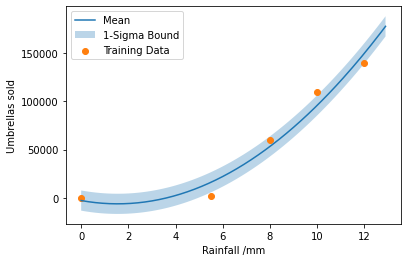

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

rainfall = np.array([0, 5.5, 10, 12, 8]).reshape(-1, 1)
umbrellas = np.array([0, 2000, 110000, 140000, 60000])

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(rainfall, umbrellas)

residuals = model.predict(rainfall) - umbrellas
sigma = np.std(residuals)

x_plot = np.arange(0, 13, 0.1).reshape(-1, 1)

plt.plot(x_plot, model.predict(x_plot), label="Mean")
plt.fill_between(np.arange(0, 13, 0.1), model.predict(x_plot) - sigma,
                 model.predict(x_plot) + sigma,
                 alpha=0.3, label="1-Sigma Bound")
plt.scatter(rainfall, umbrellas, label="Training Data")
plt.xlabel("Rainfall /mm")
plt.ylabel("Umbrellas sold")
plt.legend()
plt.show()

The regressed quadratic regression model with Gaussian distributed errors is shown by the shaded region.

We may wish to add some sort of prior distribution for the model parameters, i.e. $p_0 \sim \mathcal{N}(0, \sigma = 0.1)$ and $p_1 \sim \mathcal{N}(0, \sigma = 0.1)$, so the constant and linear terms should make minimal contribution to the model.

To find the maximum a posteriori values for the model parameters we can minimise the loss function:
$\mathcal{L} = \frac{(y - f(x, \boldsymbol{p}))^2}{2\sigma^2} - \sigma \sqrt{2 \pi} + 0.5 p_1^2 + 0.5 p_2^2$

Since the data points are independent we sum the loss for each data point. 
We rescale the data in order to improve the performance of the optimiser.

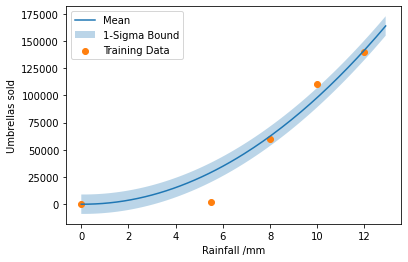

In [2]:
scale = 10000
umbrellas_rescaled = umbrellas / scale


def model(x: np.ndarray, p0: float, p1: float, p2: float) -> np.ndarray:
    """
    Quadratic Model

    Args:
        x: Input variable
        p0: Parameter
        p1: Parameter
        p2: Parameter
    """
    return p0 + p1 * x + p2 * x ** 2


def prior(p0: float, p1: float, p2: float) -> float:
    """
    Equal up to a constant to the log gaussian prior on p0 and p1
    """
    return 0.5 * p0 ** 2 / 0.01 + 0.5 * p1 ** 2 / 0.01


def loss(x: np.ndarray, y: np.ndarray, p0: float, p1: float, p2: float,
         sigma: float) -> np.ndarray:
    """
    Per datapoint loss
    """
    return ((model(x, p0, p1, p2) - y) ** 2 / (2 * sigma ** 2)
            + sigma * np.sqrt(2 * np.pi) + prior(p0, p1, p2))


def total_loss(p0, p1, p2, sigma):
    """Sum loss for all datapoints"""
    return np.sum([loss(x, y, p0, p1, p2, sigma)
                   for x, y in zip(rainfall, umbrellas_rescaled)])


result = scipy.optimize.minimize(lambda x: total_loss(*x), x0=[0, 0, 0, 1])


def model_predict(x):
    return scale * model(x, result.x[0], result.x[1], result.x[2])


sigma = scale * result.x[3]

x_plot = np.arange(0, 13, 0.1)

plt.plot(x_plot, model_predict(x_plot), label="Mean")
plt.fill_between(np.arange(0, 13, 0.1), model_predict(x_plot) - sigma,
                 model_predict(x_plot) + sigma,
                 alpha=0.3, label="1-Sigma Bound")
plt.scatter(rainfall, umbrellas, label="Training Data")
plt.xlabel("Rainfall /mm")
plt.ylabel("Umbrellas sold")
plt.legend()
plt.show()

Of course, fitting such a model with gradient descent in a library such as `pytorch` would be more efficient.

Why might this model be a poor choice?
Consider the large rainfall limits and support of the likelihood function.
What might be a better model?